### Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

In [2]:
import requests
import pandas as pd
import xml.etree.ElementTree as ET
from tqdm import tqdm

service_key = "vSkYEWotBgfYle/N78wp5dV3uoco5BGJywenZoRJWaGdnYtCB9EMBb3vjVzaXU19j2lfzM8M7Yz74saO86xJxw=="
rows_per_page = 100
total_pages = 30

all_data = []

for page in tqdm(range(1, total_pages + 1)):
    url = "http://apis.data.go.kr/6260000/BusanBIMS/busStopList"
    params = {
        "serviceKey": service_key,
        "numOfRows": rows_per_page,
        "pageNo": page
    }

    res = requests.get(url, params=params)
    root = ET.fromstring(res.content)

    items = root.find(".//items")
    if items is None:
        continue

    for item in items:
        try:
            bstopid = item.findtext("bstopid")
            bstopnm = item.findtext("bstopnm")
            gpsx = item.findtext("gpsx")
            gpsy = item.findtext("gpsy")
            all_data.append([bstopid, bstopnm, gpsx, gpsy])
        except:
            continue

df = pd.DataFrame(all_data, columns=["bstopid", "bstopnm", "lon", "lat"])
print("Ï†ÑÏ≤¥ Ï†ïÎ•òÏû• Ïàò:", len(df))

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 30/30 [00:21<00:00,  1.43it/s]

Ï†ÑÏ≤¥ Ï†ïÎ•òÏû• Ïàò: 3029


In [3]:
df.to_csv("busan_all_bus_stops.csv", index=False, encoding="utf-8-sig")
print("‚úÖ Ï†ÄÏû• ÏôÑÎ£å: busan_all_bus_stops.csv")

‚úÖ Ï†ÄÏû• ÏôÑÎ£å: busan_all_bus_stops.csv


In [4]:
df = pd.read_csv("busan_all_bus_stops.csv", encoding="utf-8-sig")
print(df.head())

     bstopid      bstopnm         lon        lat
0  167970102        ÏòÅÏ£ºÏÇºÍ±∞Î¶¨  129.033322  35.115356
1  169310303        ÏòÅÏ£ºÏÇºÍ±∞Î¶¨  129.033030  35.115283
2  167970301        ÏãúÎØºÏïÑÌååÌä∏  129.031749  35.115140
3  167840102        ÏãúÎØºÏïÑÌååÌä∏  129.032160  35.114921
4  167970302  Ï§ëÏïôÍ≥µÏõê.ÎØºÏ£ºÍ≥µÏõêÏûÖÍµ¨  129.029762  35.114487


In [5]:
# Î¨∏ÏûêÏó¥Î°ú Îì§Ïñ¥Ïò® Ï¢åÌëúÎ•º Ïà´ÏûêÌòïÏúºÎ°ú Î≥ÄÌôò
df["lon"] = pd.to_numeric(df["lon"], errors="coerce")
df["lat"] = pd.to_numeric(df["lat"], errors="coerce")

# Í≤∞Ï∏°Ïπò Ï†úÍ±∞
df = df.dropna(subset=["lon", "lat"])
print("‚úÖ ÌòïÎ≥ÄÌôò Î∞è Í≤∞Ï∏°Ïπò Ï†úÍ±∞ ÏôÑÎ£å")

‚úÖ ÌòïÎ≥ÄÌôò Î∞è Í≤∞Ï∏°Ïπò Ï†úÍ±∞ ÏôÑÎ£å


In [6]:
df_unique = df.drop_duplicates(subset=["bstopnm", "lon", "lat"])
print("‚úÖ Ï§ëÎ≥µ Ï†úÍ±∞ ÌõÑ Ï†ïÎ•òÏû• Ïàò:", len(df_unique))

‚úÖ Ï§ëÎ≥µ Ï†úÍ±∞ ÌõÑ Ï†ïÎ•òÏû• Ïàò: 3000


In [4]:
import pandas as pd

file_path = '/Users/g.j.kim/Downloads/Î∂ÄÏÇ∞ÍµêÌÜµÍ≥µÏÇ¨_ÎèÑÏãúÏ≤†ÎèÑÏó≠ÏÇ¨Ï†ïÎ≥¥_20210226.csv'

# UTF-16 Ïù∏ÏΩîÎî©Ïùò ÌÉ≠ Íµ¨Î∂Ñ ÌååÏùº ÏùΩÍ∏∞
df = pd.read_csv(file_path, encoding='utf-16', sep='\t', engine='python')

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Ï†ïÎ≥¥ Ï∂úÎ†•
print(df.info())

# ÏÉÅÏúÑ 5Í∞ú Ìñâ Ï∂úÎ†•
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ïó≠Î≤àÌò∏      114 non-null    int64  
 1   Ïó≠ÏÇ¨Î™Ö      114 non-null    object 
 2   ÎÖ∏ÏÑ†Î≤àÌò∏     114 non-null    object 
 3   ÎÖ∏ÏÑ†Î™Ö      114 non-null    object 
 4   ÏòÅÎ¨∏Ïó≠ÏÇ¨Î™Ö    114 non-null    object 
 5   ÌïúÏûêÏó≠ÏÇ¨Î™Ö    114 non-null    object 
 6   ÌôòÏäπÏó≠Íµ¨Î∂Ñ    114 non-null    object 
 7   ÌôòÏäπÎÖ∏ÏÑ†Î≤àÌò∏   12 non-null     object 
 8   ÌôòÏäπÎÖ∏ÏÑ†Î™Ö    12 non-null     object 
 9   Ïó≠ÏúÑÎèÑ      114 non-null    float64
 10  Ïó≠Í≤ΩÎèÑ      114 non-null    float64
 11  Ïö¥ÏòÅÍ∏∞Í¥ÄÎ™Ö    114 non-null    object 
 12  Ïó≠ÏÇ¨ÎèÑÎ°úÎ™ÖÏ£ºÏÜå  114 non-null    object 
 13  Ïó≠ÏÇ¨Ï†ÑÌôîÎ≤àÌò∏   114 non-null    object 
 14  Îç∞Ïù¥ÌÑ∞Í∏∞Ï§ÄÏùºÏûê  114 non-null    object 
dtypes: float64(2), int64(1), object(12)
memory usage: 13.5+ KB
None
   Ïó≠Î≤àÌò∏      Ïó≠ÏÇ¨Î™Ö   ÎÖ∏ÏÑ†Î≤àÌ

In [7]:
from sklearn.cluster import KMeans

coords = df_unique[["lat", "lon"]]
kmeans = KMeans(n_clusters=5, random_state=42)
df_unique["cluster"] = kmeans.fit_predict(coords)

print(df_unique.head())

     bstopid      bstopnm         lon        lat  cluster
0  167970102        ÏòÅÏ£ºÏÇºÍ±∞Î¶¨  129.033322  35.115356        2
1  169310303        ÏòÅÏ£ºÏÇºÍ±∞Î¶¨  129.033030  35.115283        2
2  167970301        ÏãúÎØºÏïÑÌååÌä∏  129.031749  35.115140        2
3  167840102        ÏãúÎØºÏïÑÌååÌä∏  129.032160  35.114921        2
4  167970302  Ï§ëÏïôÍ≥µÏõê.ÎØºÏ£ºÍ≥µÏõêÏûÖÍµ¨  129.029762  35.114487        2


/var/folders/wy/8fvw_q1955v9yxg3h73mwc1c0000gn/T/ipykernel_87728/1221257121.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique["cluster"] = kmeans.fit_predict(coords)


In [8]:
import folium

# ÏßÄÎèÑ Ï§ëÏã¨ÏùÑ ÎåÄÏ∂© Î∂ÄÏÇ∞ Ï§ëÍ∞ÑÏØ§ÏúºÎ°ú
map_center = [df_unique["lat"].mean(), df_unique["lon"].mean()]
m = folium.Map(location=map_center, zoom_start=12)

for _, row in df_unique.iterrows():
    folium.CircleMarker(
        location=[row["lat"], row["lon"]],
        radius=3,
        popup=row["bstopnm"],
        color="blue",
        fill=True,
        fill_opacity=0.6
    ).add_to(m)

m.save("busan_busstop_map.html")
print("‚úÖ ÏßÄÎèÑ Ï†ÄÏû• ÏôÑÎ£å (busan_busstop_map.html)")

‚úÖ ÏßÄÎèÑ Ï†ÄÏû• ÏôÑÎ£å (busan_busstop_map.html)


In [9]:
df_unique.to_csv("busan_cleaned_bus_stops.csv", index=False, encoding="utf-8-sig")
print("‚úÖ Ï†ÄÏû• ÏôÑÎ£å: busan_cleaned_bus_stops.csv")

‚úÖ Ï†ÄÏû• ÏôÑÎ£å: busan_cleaned_bus_stops.csv


In [10]:
# Ï¢åÌëúÎ•º Ïà´ÏûêÎ°ú Î≥ÄÌôò (Ïò§Î•òÍ∞íÏùÄ NaN Ï≤òÎ¶¨)
df["lon"] = pd.to_numeric(df["lon"], errors="coerce")
df["lat"] = pd.to_numeric(df["lat"], errors="coerce")

# Í≤∞Ï∏° Ï†úÍ±∞
df = df.dropna(subset=["lon", "lat"]).reset_index(drop=True)

In [11]:
from sklearn.cluster import KMeans

# ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÎåÄÏÉÅ Ï¢åÌëú
coords = df[["lat", "lon"]]

# ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò: ÏòàÏãúÎ°ú 5Í∞ú (ÏõêÌïòÎ©¥ elbow methodÎ°ú ÏµúÏ†ÅÌôî Í∞ÄÎä•)
kmeans = KMeans(n_clusters=5, random_state=42)
df["cluster"] = kmeans.fit_predict(coords)

/var/folders/wy/8fvw_q1955v9yxg3h73mwc1c0000gn/T/ipykernel_87728/2207268340.py:14: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/wy/8fvw_q1955v9yxg3h73mwc1c0000gn/T/ipykernel_87728/2207268340.py:14: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/wy/8fvw_q1955v9yxg3h73mwc1c0000gn/T/ipykernel_87728/2207268340.py:14: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/wy/8fvw_q1955v9yxg3h73mwc1c0000gn/T/ipykernel_87728/2207268340.py:14: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/wy/8fvw_q1955v9yxg3h73mwc1c0000gn/T/ipykernel_87728/2207268340.py:14: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/wy/8fvw_q1955v9yxg3h73mwc1c0000gn/T/ipyker

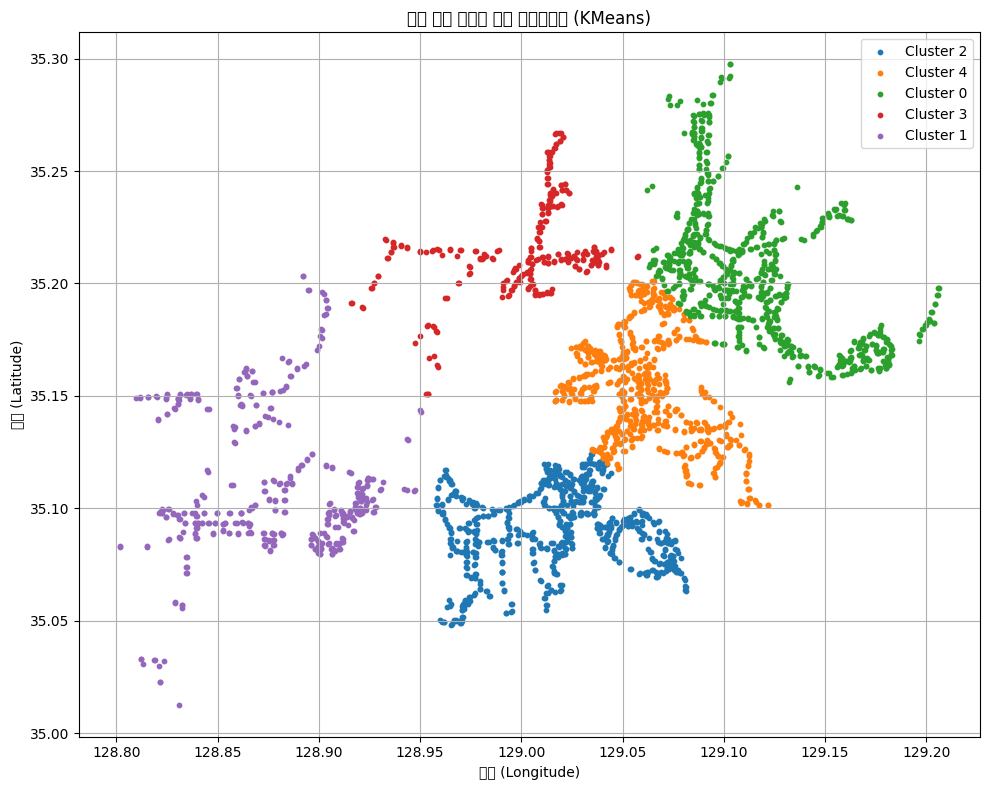

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

for cluster_num in df["cluster"].unique():
    cluster_data = df[df["cluster"] == cluster_num]
    plt.scatter(cluster_data["lon"], cluster_data["lat"], label=f"Cluster {cluster_num}", s=10)

plt.title("Î∂ÄÏÇ∞ Î≤ÑÏä§ Ï†ïÎ•òÏû• ÏúÑÏπò ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ (KMeans)")
plt.xlabel("Í≤ΩÎèÑ (Longitude)")
plt.ylabel("ÏúÑÎèÑ (Latitude)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
print(df["cluster"].value_counts())

cluster
0    827
2    766
4    718
1    434
3    284
Name: count, dtype: int64


In [32]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


### Î≤°Ïä§ÏΩî Î∞òÍ≤Ω ÎÇ¥ Ï†ïÎ•òÏû• Ïàò 

In [36]:
import requests
import pandas as pd
from tqdm import tqdm
import xml.etree.ElementTree as ET

service_key = "vSkYEWotBgfYle/N78wp5dV3uoco5BGJywenZoRJWaGdnYtCB9EMBb3vjVzaXU19j2lfzM8M7Yz74saO86xJxw=="
rows_per_page = 100
total_pages = 30  # Ïö∞ÏÑ† 30ÌéòÏù¥ÏßÄÍπåÏßÄÎßå

all_data = []

for page in tqdm(range(1, total_pages + 1)):
    url = "http://apis.data.go.kr/6260000/BusanBIMS/busStopList"
    params = {
        "serviceKey": service_key,
        "numOfRows": rows_per_page,
        "pageNo": page
    }

    res = requests.get(url, params=params)
    root = ET.fromstring(res.content)

    items = root.find(".//items")
    if items is None:
        continue

    for item in items:
        try:
            bstopid = item.findtext("bstopid")
            bstopnm = item.findtext("bstopnm")
            gpsx = item.findtext("gpsx")
            gpsy = item.findtext("gpsy")
            all_data.append([bstopid, bstopnm, gpsx, gpsy])
        except:
            continue

df = pd.DataFrame(all_data, columns=["bstopid", "bstopnm", "lon", "lat"])
print("Ï†ÑÏ≤¥ Ï†ïÎ•òÏû• Ïàò:", len(df))

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 30/30 [00:20<00:00,  1.43it/s]

Ï†ÑÏ≤¥ Ï†ïÎ•òÏû• Ïàò: 3029


In [37]:
from geopy.distance import geodesic

# Î≤°Ïä§ÏΩî Ïó≠ Í∏∞Ï§Ä Ï¢åÌëú
bexco_coord = (35.16834, 129.1368)

# Í±∞Î¶¨ Í≥ÑÏÇ∞
df["distance_from_bexco"] = df.apply(lambda row: geodesic((float(row["lat"]), float(row["lon"])), bexco_coord).meters, axis=1)
df_bexco_near = df[df["distance_from_bexco"] <= 500]

print("‚úÖ Î≤°Ïä§ÏΩî Î∞òÍ≤Ω ÎÇ¥ Ï†ïÎ•òÏû• Ïàò:", len(df_bexco_near))
print(df_bexco_near[["bstopnm", "lon", "lat", "distance_from_bexco"]])

‚úÖ Î≤°Ïä§ÏΩî Î∞òÍ≤Ω ÎÇ¥ Ï†ïÎ•òÏû• Ïàò: 13
              bstopnm               lon              lat  distance_from_bexco
1642        ÏÑºÌÖÄÏãúÌã∞Ïó≠.Î≤°Ïä§ÏΩî  129.133255322926  35.169517403775           348.340013
1742        ÏÑºÌÖÄÏãúÌã∞Ïó≠.Î≤°Ïä§ÏΩî  129.132774068402  35.169742383607           398.398809
1764       Î°ØÎç∞Î∞±ÌôîÏ†êÏÑºÌÖÄÏãúÌã∞Ï†ê  129.131784305782  35.169673237343           480.274658
1799              Î≤°Ïä§ÏΩî  129.133947317281  35.167539789811           274.628382
1800              Î≤°Ïä§ÏΩî  129.133706773686  35.167363799445           301.892720
1801       Î°ØÎç∞Î∞±ÌôîÏ†êÏÑºÌÖÄÏãúÌã∞Ï†ê  129.132035677781  35.169979525655           470.603031
1837  Î≤°Ïä§ÏΩîÏó≠.Ïò¨Î¶ºÌîΩÍµêÏ∞®Î°úÌôòÏäπÏÑºÌÑ∞   129.13740056272  35.167820959936            79.431325
1866          ÎèôÌï¥ÏÑ†Î≤°Ïä§ÏΩîÏó≠  129.134082572524  35.171664655398           444.222212
1868        Î≤°Ïä§ÏΩî.ÏãúÎ¶ΩÎØ∏Ïà†Í¥Ä  129.136989719974    35.1705725582           248.290501
1869       Ïò¨Î¶ºÌîΩÍµêÏ∞®Î°úÌôòÏäπ

In [39]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [41]:
import folium

# Î≤°Ïä§ÏΩî Ï§ëÏã¨
bexco_lat, bexco_lon = 35.16834, 129.1368
m = folium.Map(location=[bexco_lat, bexco_lon], zoom_start=16)

# Î≤°Ïä§ÏΩî ÏúÑÏπò ÎßàÏª§
folium.Marker([bexco_lat, bexco_lon], tooltip="Î≤°Ïä§ÏΩî", icon=folium.Icon(color="red")).add_to(m)

# Ï£ºÎ≥Ä Ï†ïÎ•òÏû• ÎßàÏª§
for _, row in df_bexco_near.iterrows():
    folium.Marker(
        [float(row["lat"]), float(row["lon"])],
        tooltip=f"{row['bstopnm']} ({int(row['distance_from_bexco'])}m)"
    ).add_to(m)

m

### Î≤°Ïä§ÏΩî Î∞òÍ≤Ω 500mÎÇ¥ Ï†ïÎ•òÏû•

In [ ]:
import requests
from tqdm import tqdm
import time


df_bexco_near = df_bexco_near.reset_index(drop=True)

service_key = "vSkYEWotBgfYle/N78wp5dV3uoco5BGJywenZoRJWaGdnYtCB9EMBb3vjVzaXU19j2lfzM8M7Yz74saO86xJxw=="

In [44]:
def get_bus_arrival_info(bstopid, service_key):
    url = "http://apis.data.go.kr/6260000/BusanBIMS/busArrivalList"
    params = {
        "serviceKey": service_key,
        "bstopid": bstopid,
    }
    response = requests.get(url, params=params)
    if response.status_code == 200:
        return response.text
    else:
        return None

In [ ]:
arrival_results = []

for _, row in tqdm(df_bexco_near.iterrows(), total=len(df_bexco_near)):
    bstopid = row["bstopid"]
    raw_xml = get_bus_arrival_info(bstopid, service_key)
    arrival_results.append({
        "bstopid": bstopid,
        "bstopnm": row["bstopnm"],
        "response": raw_xml
    })
    time.sleep(0.2)  

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 13/13 [00:44<00:00,  3.43s/it]


In [67]:
for item in arrival_results[:3]:
    print(f"\nüöå Ï†ïÎ•òÏû•: {item['bstopnm']} ({item['bstopid']})")



üöå Ï†ïÎ•òÏû•: ÏÑºÌÖÄÏãúÌã∞Ïó≠.Î≤°Ïä§ÏΩî (185130101)

üöå Ï†ïÎ•òÏû•: ÏÑºÌÖÄÏãúÌã∞Ïó≠.Î≤°Ïä§ÏΩî (185100201)

üöå Ï†ïÎ•òÏû•: Î°ØÎç∞Î∞±ÌôîÏ†êÏÑºÌÖÄÏãúÌã∞Ï†ê (184300201)


In [69]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


/opt/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48289 (\N{HANGUL SYLLABLE BEG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_fig

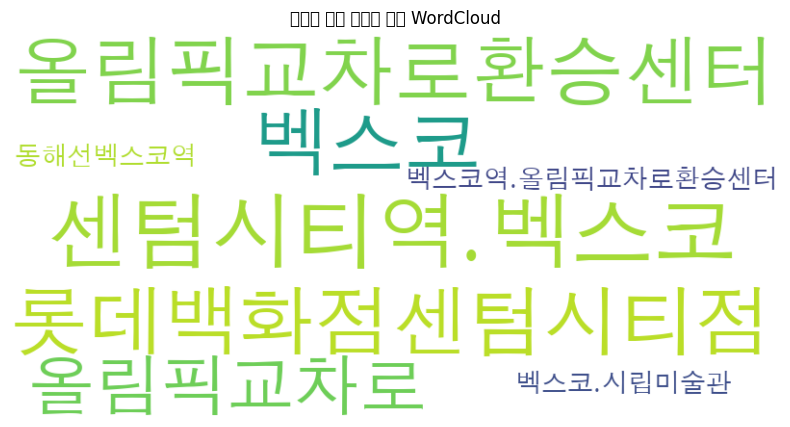

In [70]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 1. Ï†ïÎ•òÏû• Ïù¥Î¶Ñ Î™®ÏúºÍ∏∞
names = df_bexco_near['bstopnm'].tolist()

# 2. ÎùÑÏñ¥Ïì∞Í∏∞ Í∏∞Ï§ÄÏúºÎ°ú Îã®Ïñ¥ ÎÇòÎàÑÍ≥† ÎπàÎèÑÏàò ÏÑ∏Í∏∞
all_words = ' '.join(names).split()
word_counts = Counter(all_words)

# 3. ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú
wc = WordCloud(font_path="/System/Library/Fonts/Supplemental/AppleGothic.ttf", background_color='white', width=800, height=400)
wc.generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Î≤°Ïä§ÏΩî Ï£ºÎ≥Ä Ï†ïÎ•òÏû• Ïù¥Î¶Ñ WordCloud")
plt.show()

### Ï†ïÎ•òÏû• ÏúÑÏπò(ÏúÑÎèÑ, Í≤ΩÎèÑ)Í∏∞Ï§ÄÏúºÎ°ú Í≥µÍ∞ÑÏ†ÅÏúºÎ°ú Í∞ÄÍπåÏö¥ Ï†ïÎ•òÏû• ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ

/var/folders/wy/8fvw_q1955v9yxg3h73mwc1c0000gn/T/ipykernel_84143/2274624793.py:24: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/wy/8fvw_q1955v9yxg3h73mwc1c0000gn/T/ipykernel_84143/2274624793.py:24: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/wy/8fvw_q1955v9yxg3h73mwc1c0000gn/T/ipykernel_84143/2274624793.py:24: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/wy/8fvw_q1955v9yxg3h73mwc1c0000gn/T/ipykernel_84143/2274624793.py:24: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/wy/8fvw_q1955v9yxg3h73mwc1c0000gn/T/ipykernel_84143/2274624793.py:24: UserWarning: Glyph 47448 (\N{HANGUL SYLLABLE RYU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/wy/8fvw_q1955v9yxg3h73mwc1c0000gn/T/ipy

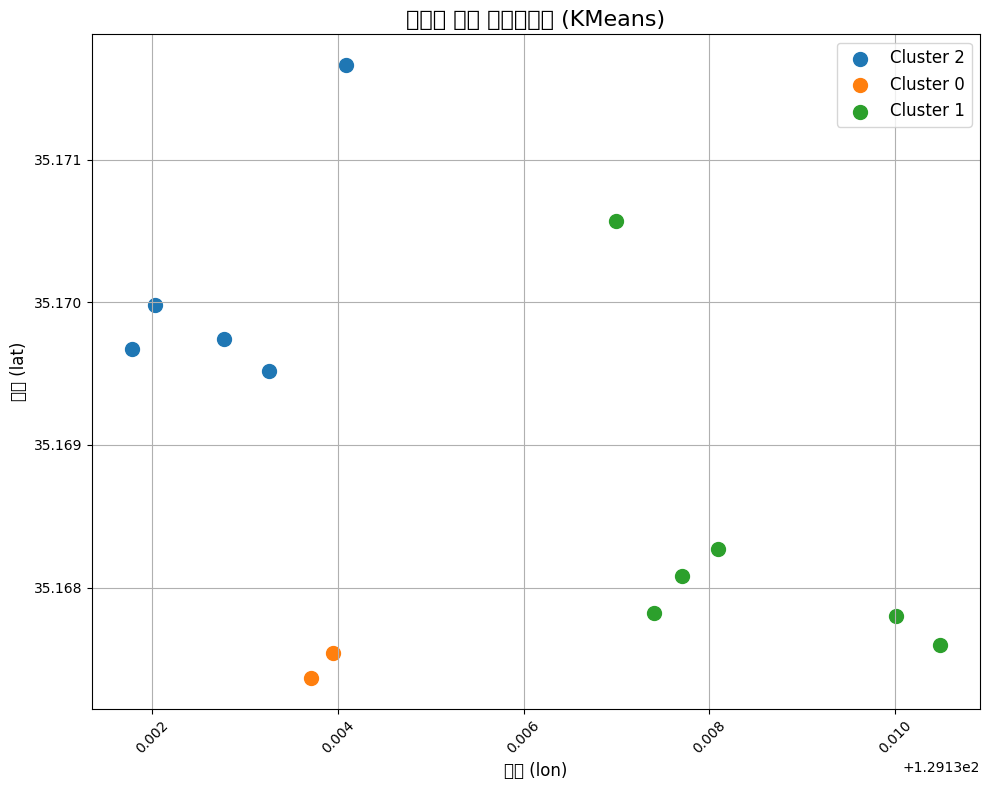

In [75]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÎåÄÏÉÅ Ï¢åÌëú
coords = df_bexco_near[['lat', 'lon']]

# ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò ÏßÄÏ†ï
kmeans = KMeans(n_clusters=3, random_state=42)
df_bexco_near['cluster'] = kmeans.fit_predict(coords)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 8))
for c in df_bexco_near['cluster'].unique():
    cluster_data = df_bexco_near[df_bexco_near['cluster'] == c]
    plt.scatter(cluster_data['lon'], cluster_data['lat'], s=100, label=f'Cluster {c}')  # s=ÎßàÏª§ ÌÅ¨Í∏∞

plt.title("Ï†ïÎ•òÏû• ÏúÑÏπò ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ (KMeans)", fontsize=16)
plt.xlabel("Í≤ΩÎèÑ (lon)", fontsize=12)
plt.ylabel("ÏúÑÎèÑ (lat)", fontsize=12)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

In [76]:
print(df_bexco_near['cluster'].value_counts())

cluster
1    6
2    5
0    2
Name: count, dtype: int64
